In [1]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)
%cd "gdrive/My Drive/Colab Notebooks/image-colorization"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/image-colorization


In [0]:
gray_path = "./l/gray_scale.npy"
color_path1 = "./ab/ab/ab1.npy"
color_path2 = "./ab/ab/ab2.npy"
color_path3 = "./ab/ab/ab3.npy"

In [0]:
import random
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
from skimage import transform
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
num_images = 20000
images_lab1 = np.load(color_path1,allow_pickle=True) #consist of 10000 images. Note: ab3 contains 5000 images
images_lab2 = np.load(color_path2,allow_pickle=True)
# images_lab = np.append(images_lab1,images_lab2)
images_lab = np.concatenate([images_lab1,images_lab2], axis=0)
images_gray = np.load(gray_path,allow_pickle=True)[:num_images] #load first 100000 images of total 25000

In [5]:
from keras.models import Model,Sequential
from keras.layers import Dense,Dropout,Conv2D,GlobalMaxPooling1D,MaxPooling1D,GRU,SpatialDropout1D,Input,BatchNormalization, UpSampling2D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from keras.regularizers import l2
from keras.models import load_model

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 256, 256
channel = 3
batch_size = 32
epochs = 500
kernel = 3
l2_reg = l2(1e-3)
num_classes = 313
T = 0.38

In [0]:
model = Sequential()

model.add(Conv2D(64, (kernel, kernel),input_shape=(img_rows, img_cols, 1), activation='relu', padding='same', name='conv1_1',
                 kernel_initializer="he_normal",kernel_regularizer=l2_reg))

model.add(Conv2D(64, (kernel, kernel), activation='relu', padding='same', name='conv1_2', kernel_initializer="he_normal",
        kernel_regularizer=l2_reg, strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (kernel, kernel), activation='relu', padding='same', name='conv2_1', kernel_initializer="he_normal",
        kernel_regularizer=l2_reg))
model.add(Conv2D(128, (kernel, kernel), activation='relu', padding='same', name='conv2_2', kernel_initializer="he_normal",
        kernel_regularizer=l2_reg,
        strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv3_1',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv3_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv3_3', kernel_initializer="he_normal",
        strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', name='conv4_1',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', name='conv4_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', name='conv4_3',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(BatchNormalization())

model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv5_1',
             kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv5_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv5_3',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(BatchNormalization())

model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv6_1',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv6_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(512, (kernel, kernel), activation='relu', padding='same', dilation_rate=2, name='conv6_3',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(BatchNormalization())

model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv7_1',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv7_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(256, (kernel, kernel), activation='relu', padding='same', name='conv7_3',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(BatchNormalization())

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(128, (kernel, kernel), activation='relu', padding='same', name='conv8_1',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(128, (kernel, kernel), activation='relu', padding='same', name='conv8_2',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(Conv2D(128, (kernel, kernel), activation='relu', padding='same', name='conv8_3',
        kernel_initializer="he_normal", kernel_regularizer=l2_reg))
model.add(BatchNormalization())

model.add(Conv2D(num_classes, (1, 1), activation='softmax', padding='same', name='pred'))


In [0]:
sgd = SGD(lr=0.001, momentum=0.9, nesterov=True, clipnorm=5.)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 256, 256, 64)      640       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 128, 64)      256       
_________________________________________________________________
conv2_1 (Conv2D)             (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 64, 64, 128)       147584    
_________________________________________________________________
batch_normalization_10 (Batc (None, 64, 64, 128)       512       
_________________________________________________________________
conv3_1 (Conv2D)             (None, 64, 64, 256)      

In [0]:
def scale_images(images_gray,images_lab):
    images_lab_scaled = []
    images_gray_scaled = []
    for i in range(len(images_lab)):
        scaled_image = cv2.resize(images_lab[i], (64, 64), cv2.INTER_CUBIC)
        images_lab_scaled.append(scaled_image)
        scaled_image = cv2.resize(images_gray[i], (img_rows, img_cols), cv2.INTER_CUBIC)
        images_gray_scaled.append(scaled_image)
    images_lab_scaled = np.array(images_lab_scaled)
    images_gray_scaled = np.array(images_gray_scaled)
    images_gray_scaled = images_gray_scaled.reshape(len(images_gray),img_rows,img_cols,1)
    return images_gray_scaled,images_lab_scaled

def get_discrete_values_for(image_ab,nn_finder, nb_ab):
    height, wdith = image_ab.shape[:2]
    a = np.ravel(image_ab[:, :, 0])
    b = np.ravel(image_ab[:, :, 1])
    ab = np.vstack((a, b)).T
    dist_neighb, idx_neigh = nn_finder.kneighbors(ab)
    sigma_neighbor = 5
    wts = np.exp(-dist_neighb ** 2 / (2 * sigma_neighbor ** 2))
    wts = wts / np.sum(wts, axis=1)[:, np.newaxis]
    y = np.zeros((ab.shape[0], nb_ab))    
    idx_pts = np.arange(ab.shape[0])[:, np.newaxis]
    y[idx_pts, idx_neigh] = wts
    y = y.reshape(height, wdith, nb_ab)
    return y

In [0]:
import numpy as np
import keras
import sklearn.neighbors as nn

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, images_gray, images_lab, batch_size=batch_size):
        'Initialization'
        self.images_gray = images_gray
        self.images_lab = images_lab
        self.batch_size = batch_size
        pts_in_hull = np.load('pts_in_hull.npy')
        self.nb_q = pts_in_hull.shape[0]
        self.nn_finder = nn.NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(pts_in_hull)
        self.out_img_rows, self.out_img_cols = img_rows // 4, img_cols // 4
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.images_gray) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        gray_batch = self.images_gray[index*self.batch_size:(index+1)*self.batch_size]
        color_batch = self.images_lab[index*self.batch_size:(index+1)*self.batch_size]
        gray_batch,color_batch = scale_images(gray_batch,color_batch)
        color_batch = color_batch.astype(np.int32) - 128
        y = self.generate_label(color_batch)
        X = (gray_batch/255).astype(np.float32)
        y = np.array(y)
        return X, y

    def generate_label(self,color_images):
        return [get_discrete_values_for(img,self.nn_finder, self.nb_q) for img in color_images]        

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        pass

train_gen = DataGenerator(images_gray,images_lab)

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model = load_model("checkpoint_extended_set.hdf5")
patience = 50
# model.load_weights("checkpoint.hdf5")
model_checkpoint = ModelCheckpoint("checkpoint_extended_set.hdf5", monitor='loss', verbose=1, save_best_only=True)
early_stop = EarlyStopping('loss', patience=patience)
reduce_lr = ReduceLROnPlateau('loss', factor=0.1, patience=int(patience / 4), verbose=1)
callbacks = [model_checkpoint, early_stop, reduce_lr]
model.fit_generator(train_gen,
                            steps_per_epoch=num_images // batch_size,                       
                            epochs=epochs,
                            verbose=1,
                            callbacks=callbacks,
                            use_multiprocessing=True,
                            workers=5,
                    initial_epoch=449
                            )
model.save('./colorization_full_extended_set.h5') 

Epoch 418/500
625/625 [==============================] - 456s 729ms/step - loss: 3.2435

Epoch 00418: loss improved from inf to 3.24349, saving model to checkpoint_extended_set.hdf5
Epoch 419/500
625/625 [==============================] - 445s 713ms/step - loss: 3.2304

Epoch 00419: loss improved from 3.24349 to 3.23041, saving model to checkpoint_extended_set.hdf5
Epoch 420/500
625/625 [==============================] - 444s 711ms/step - loss: 3.2187

Epoch 00420: loss improved from 3.23041 to 3.21870, saving model to checkpoint_extended_set.hdf5
Epoch 421/500
625/625 [==============================] - 443s 709ms/step - loss: 3.2067

Epoch 00421: loss improved from 3.21870 to 3.20674, saving model to checkpoint_extended_set.hdf5
Epoch 422/500
625/625 [==============================] - 446s 714ms/step - loss: 3.1941

Epoch 00422: loss improved from 3.20674 to 3.19410, saving model to checkpoint_extended_set.hdf5
Epoch 423/500
625/625 [==============================] - 447s 714ms/step -

In [0]:
# from keras.models import load_model
# model.save('./colorization_model_less.h5') 

In [0]:
model = load_model('./model.hdf5')
# model = load_model('checkpoint_extended_set.hdf5')

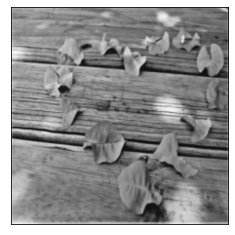

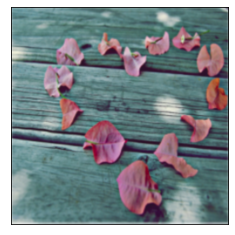

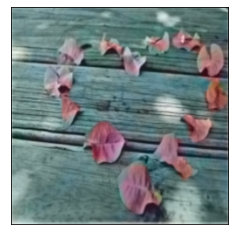

In [27]:
index = 1
gray = images_gray[index]
ab = images_lab[index]

def get_rgb_img(gray,ab):
    gray = cv2.resize(gray, (img_rows, img_cols))
    ab = cv2.resize(ab, (img_rows, img_cols))
    img = np.zeros((256, 256, 3))
    img[:, :, 0] = gray
    img[ :, :, 1:] = ab     
    img = img.astype("uint8")
    img_ = cv2.cvtColor(img, cv2.COLOR_LAB2RGB)
    return img_
color_og = get_rgb_img(gray,ab)


def predict_(input_gray,model):
  input_gray = cv2.resize(input_gray, (img_rows, img_cols))
  og_grey_img = input_gray
  input_gray = input_gray/255
  input_gray= input_gray.reshape(1,img_rows,img_cols,1)
  y_pred = model.predict(input_gray)
  q_ab = np.load("pts_in_hull.npy")
  epsilon = 1e-8
  X_colorized = y_pred
  nb_q = q_ab.shape[0]
  X_colorized = X_colorized.reshape((64 * 64, nb_q))
  X_colorized = np.exp(np.log(X_colorized + epsilon) / T)
  X_colorized = X_colorized / np.sum(X_colorized, 1)[:, np.newaxis]

  q_a = q_ab[:, 0].reshape((1, 313))
  q_b = q_ab[:, 1].reshape((1, 313))

  X_a = np.sum(X_colorized * q_a, 1).reshape((64,64))
  X_b = np.sum(X_colorized * q_b, 1).reshape((64,64))
  X_a = cv2.resize(X_a, (img_rows, img_cols), cv2.INTER_CUBIC)
  X_b = cv2.resize(X_b, (img_rows, img_cols), cv2.INTER_CUBIC)

  X_a = X_a + 128
  X_b = X_b + 128

  out_lab = np.zeros((img_rows, img_cols, 3), dtype=np.int32)
  out_lab[:, :, 0] = og_grey_img
  out_lab[:, :, 1] = X_a
  out_lab[:, :, 2] = X_b
  out_lab = out_lab.astype(np.uint8)
  out_bgr = cv2.cvtColor(out_lab, cv2.COLOR_LAB2RGB)
  return out_bgr

out_bgr = predict_(gray,model)

plt.imshow(gray, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(color_og, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(out_bgr, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [0]:
test_images_gray = np.load(gray_path,allow_pickle=True)[20000:]
test_images_ab = np.load(color_path3,allow_pickle=True)

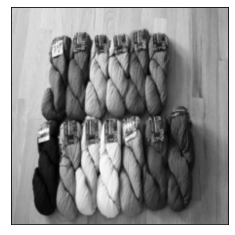

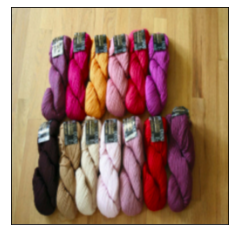

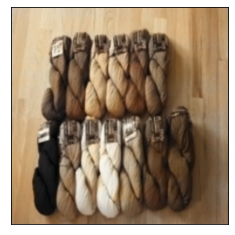

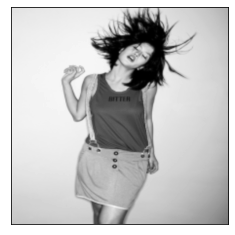

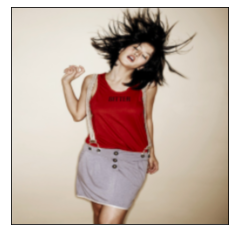

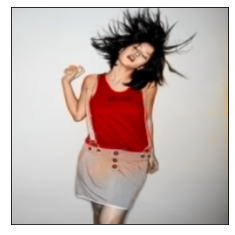

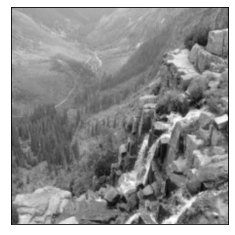

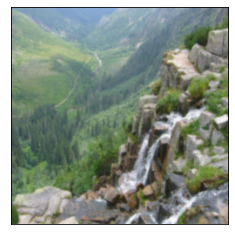

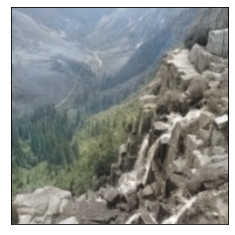

In [24]:
test_image_index = [275,10,11]
for i in range(len(test_image_index)):
    color_og = get_rgb_img(test_images_gray[test_image_index[i]],test_images_ab[test_image_index[i]])
    color_predict = predict_(test_images_gray[test_image_index[i]],model)
    plt.imshow(test_images_gray[test_image_index[i]], cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()
    plt.imshow(color_og, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()
    plt.imshow(color_predict, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])
    plt.show()